In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

import joblib


In [21]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
#data cleaning
zero_invalid_cols = ["trestbps", "chol", "thalach", "oldpeak"]
df[zero_invalid_cols] = df[zero_invalid_cols].replace(0, np.nan)

df.fillna(df.median(), inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [23]:
X = df.drop("target", axis=1)
y = df["target"]

feature_names = X.columns.tolist()

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature names:", feature_names)

Features shape: (1025, 13)
Target shape: (1025,)
Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
#Build Pipelines
scaler = StandardScaler()

lr_pipeline = Pipeline([
    ("scaler", scaler),
    ("model", LogisticRegression(max_iter=1000))
])


In [26]:
dt_pipeline = Pipeline([
    ("model", DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=5))
])



In [27]:
lr_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)


Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        random_state=42))])

In [28]:
lr_preds = lr_pipeline.predict(X_test)
dt_preds = dt_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

print("\nLogistic Regression Report:\n", classification_report(y_test, lr_preds))
print("\nDecision Tree Report:\n", classification_report(y_test, dt_preds))


Logistic Regression Accuracy: 0.775609756097561
Decision Tree Accuracy: 0.8292682926829268

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       102
           1       0.73      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.77       205
weighted avg       0.79      0.78      0.77       205


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       102
           1       0.79      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



In [29]:
joblib.dump(lr_pipeline, "logistic_regression_model.joblib")
joblib.dump(dt_pipeline, "decision_tree_model.joblib")
joblib.dump(feature_names, "feature_names.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

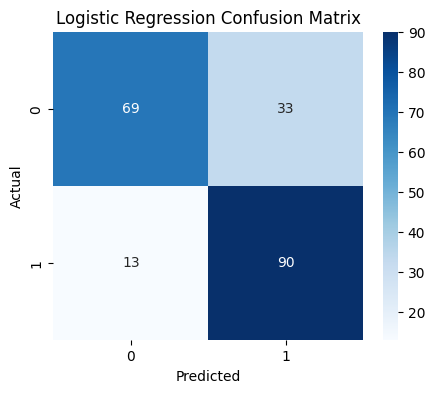

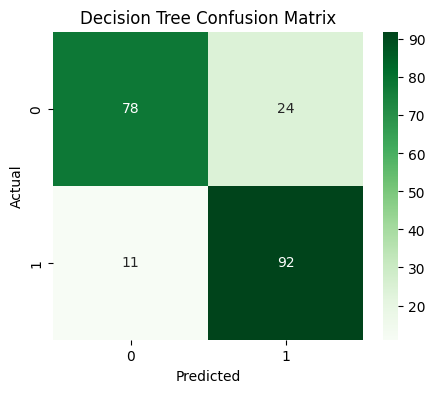

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, lr_preds)
cm_dt = confusion_matrix(y_test, dt_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(lr_pipeline, X, y, cv=5, scoring="accuracy")
dt_cv = cross_val_score(dt_pipeline, X, y, cv=5, scoring="accuracy")

print("Logistic Regression CV Accuracy:", lr_cv.mean())
print("Decision Tree CV Accuracy:", dt_cv.mean())


Logistic Regression CV Accuracy: 0.8351219512195123
Decision Tree CV Accuracy: 0.8731707317073172


In [34]:
importances = dt_pipeline.named_steps["model"].feature_importances_
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

importance_df


,feature,importance
2,cp,0.360750
12,thal,0.193357
11,ca,0.140664
9,oldpeak,0.072505
7,thalach,0.072365
10,slope,0.033760
4,chol,0.033637
0,age,0.029469
8,exang,0.024791
3,trestbps,0.019453
